### 1.1 Data Loading

In [96]:
# Task 1: Load the dataset food order.csv into a pandas DataFrame
import pandas as pd
file_path_food_order = "/Users/DELL/Documents/SkillsForHire/Python/Assignment/food_order.csv"
df = pd.read_csv(file_path_food_order)

In [97]:
# Task 2: Display the first 10 rows of your dataset.
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


### 1.2 Data Description

In [98]:
# Task 3: Identify the data types for each feature.
print(df.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [99]:
df.isnull().any()

order_id                 False
customer_id              False
restaurant_name          False
cuisine_type             False
cost_of_the_order        False
day_of_the_week          False
rating                   False
food_preparation_time    False
delivery_time            False
dtype: bool

In [100]:
# Task 4: Write a function that calculates the ”null rate”for each column.
#The null rate is the number of null values as a percentage of the total number of samples in the dataset.
def null_rate(df):
    """
    Calculates the null rate (percentage of missing values) for each column in a Pandas DataFrame.
    """
    null_counts = df.isnull().sum()
    total_counts = len(df)
    null_rates = null_counts / total_counts * 100
    return null_rates

In [101]:
null_rates = null_rate(df)
print(null_rates)

order_id                 0.0
customer_id              0.0
restaurant_name          0.0
cuisine_type             0.0
cost_of_the_order        0.0
day_of_the_week          0.0
rating                   0.0
food_preparation_time    0.0
delivery_time            0.0
dtype: float64


In [102]:
# Task 5: Identify the number of unique values for each column.
unique_counts = df.nunique()
print(unique_counts)

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


### 1.3 Data Manipulation

In [103]:
# Task 6: Add one column, total time, that is defined by the sum of food preparation time and delivery time.
# Units for food preparation time and delivery time are in minutes. So should the units for total time be.
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


### 1.4 Satistics

In [104]:
# Task 7: Identify the different cusine types.
cuisine_types = df['cuisine_type'].unique()
print(cuisine_types)

['Korean' 'Japanese' 'Mexican' 'American' 'Indian' 'Italian'
 'Mediterranean' 'Chinese' 'Middle Eastern' 'Thai' 'Southern' 'French'
 'Spanish' 'Vietnamese']


In [105]:
# Task 8: Find the number of restaurants per cuisine type.
restaurant_counts = df.groupby('cuisine_type')['restaurant_name'].nunique()
print(restaurant_counts)

cuisine_type
American          41
Chinese           16
French             3
Indian            14
Italian           31
Japanese          29
Korean             5
Mediterranean      5
Mexican           11
Middle Eastern     7
Southern           2
Spanish            3
Thai               9
Vietnamese         3
Name: restaurant_name, dtype: int64


### 1.5 Visualization

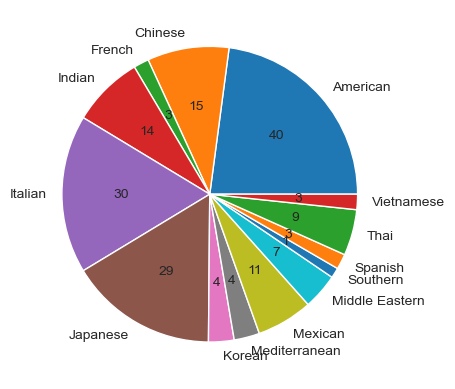

In [106]:
# task 9(a): Using your results from Task 8, and using a pie chart display the count of restaurants per cuisine type.
import matplotlib.pyplot as plt

labels = restaurant_counts.index
counts = restaurant_counts.values

plt.pie(counts, labels=labels, autopct=lambda x: f'{int(x * sum(counts) / 100)}')
plt.show()

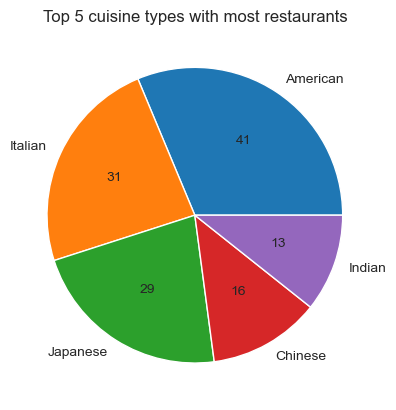

In [107]:
# Task 9(b): Show only the 5 cuisine types with most restaurants.
import matplotlib.pyplot as plt

top_5 = restaurant_counts.nlargest(5)
counts = top_5.values


plt.pie(top_5, labels=top_5.index, autopct=lambda x: f'{int(x * sum(counts) / 100)}')
plt.title('Top 5 cuisine types with most restaurants')
plt.show()

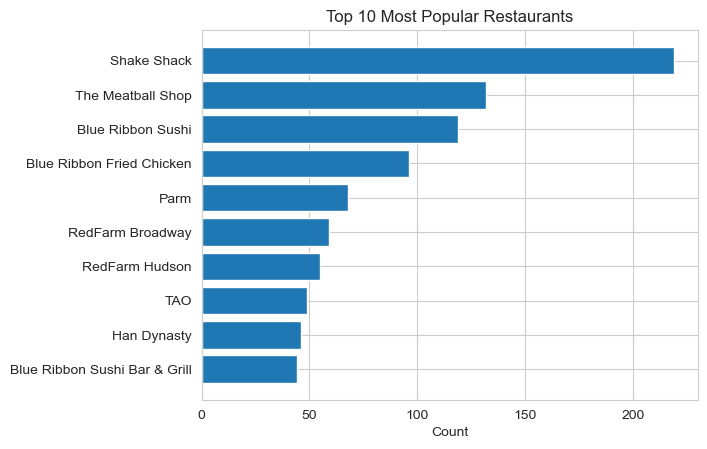

In [108]:
# Task 10(a): Plot a graph that shows the 10 most popular restaurant name.
import matplotlib.pyplot as plt

top_10_restaurants = df['restaurant_name'].value_counts().nlargest(10)

plt.barh(top_10_restaurants.index, top_10_restaurants.values)
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Popular Restaurants')
plt.show()

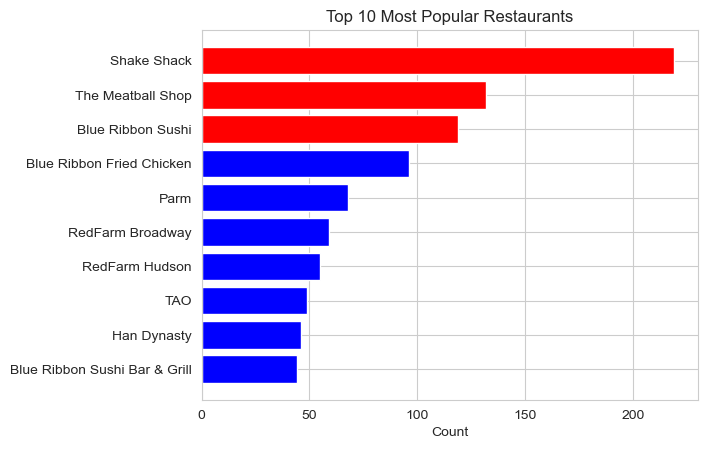

In [109]:
# Task 10(b): Highlight the top 3.
import matplotlib.pyplot as plt

top_10_restaurants = df['restaurant_name'].value_counts().nlargest(10)

colors = ['red' if name in top_10_restaurants[:3].index else 'blue' for name in top_10_restaurants.index]

plt.barh(top_10_restaurants.index, top_10_restaurants.values, color=colors)
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.title('Top 10 Most Popular Restaurants')
plt.show()

In [110]:
# Task 12(a): What is the proportion of reviews for Shake Shack?

proportion = df.restaurant_name.value_counts(normalize=True)
print(proportion)

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: restaurant_name, Length: 178, dtype: float64


In [111]:
Shake_shack_prop = df.restaurant_name.value_counts(normalize=True).iloc[0]
print(Shake_shack_prop)

0.11538461538461539


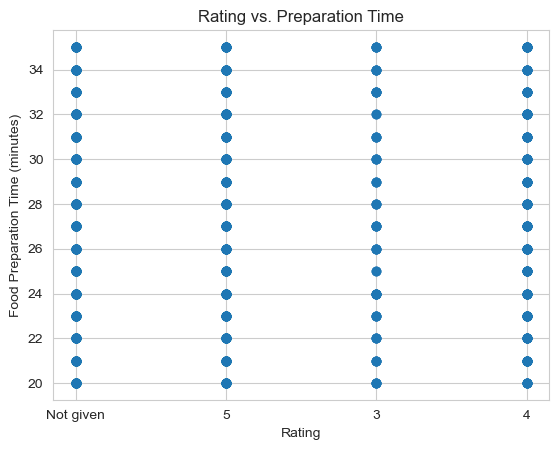

In [112]:
# Task 13: # Task 13: Is there a link between ratings and food preparation time? Justify your answer.
# You may use an appropriate graph.

import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(df.rating, df.food_preparation_time, alpha=0.5)
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time (minutes)')
plt.title('Rating vs. Preparation Time')
plt.show()

# From the scatter plot, we can see that there is no clear relationship between 
# the rating and the preparation time. There are restaurants with high ratings 
# that have both short and long preparation times, as well as restaurants with 
# low ratings that have both short and long preparation times. 
# Therefore, we can conclude that there is no significant link between ratings and food preparation time.

<Figure size 800x600 with 0 Axes>

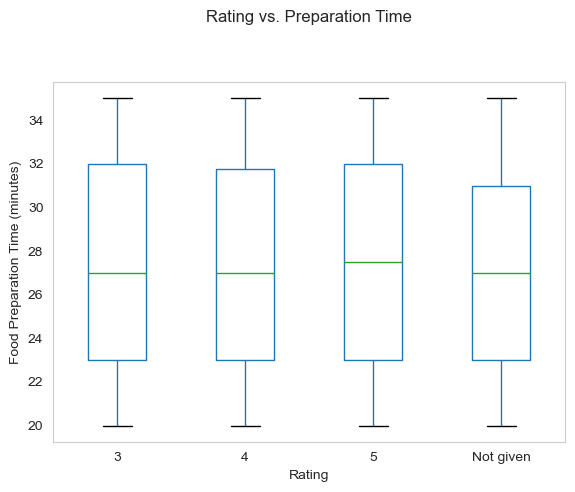

In [113]:
# Task 13: Is there a link between ratings and food preparation time? Justify your answer.
# You may use an appropriate graph.

import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df.boxplot(column='food_preparation_time', by='rating', grid=False)
plt.xlabel('Rating')
plt.ylabel('Food Preparation Time (minutes)')
plt.title('')
plt.suptitle('Rating vs. Preparation Time', y=1.05)
plt.show()

# From the box plot, we can see that there is no clear trend between ratings and preparation time. 
# The median preparation time for each rating category is similar, and the range of preparation
# times is wide for all categories. Therefore, we can conclude that there is no significant link 
# between ratings and food preparation time.

### Part 2

### 2.1 Data Loading

In [114]:
# Task 1: Load the dataset movies shows .csv into a pandas DataFrame.

import pandas as pd
file_path_tweets = "/Users/DELL/Documents/SkillsForHire/Python/Assignment/tweets.csv"
df = pd.read_csv(file_path_tweets)

In [115]:
# Task 2: Display the last 10 rows of your dataset. 

df.tail(10)

,Tweets,Retweets,Likes,Date
3050,@cybrtrkguy Vote them out,7712,68748,2022-01-27 23:41:28
3051,"If you scare people enough, they will demand r...",119804,543466,2022-01-27 23:39:57
3052,Seems odd that the UN still hasn’t released 20...,32799,262118,2022-01-27 22:24:24
3053,@jayvasdigital Freedom is being stripped away ...,12348,63170,2022-01-27 22:05:43
3054,@LimitingThe @baglino Manganese also requires ...,128,2543,2022-01-27 22:03:29
3055,@LimitingThe @baglino Just that manganese is a...,171,3173,2022-01-27 22:01:06
3056,@incentives101 @ICRicardoLara Exactly,145,4234,2022-01-27 21:23:20
3057,@ICRicardoLara Your policies are directly resp...,421,6144,2022-01-27 21:13:57
3058,@ICRicardoLara You should be voted out of office,484,7029,2022-01-27 21:12:27
3059,CB radios are free from govt/media control,11302,113429,2022-01-27 21:00:09


In [116]:
# Task 3: Remove hyperlinks.
# Task 4: Remove stopwords.
# Task 5: Remove mentions. Here you want to remove the symbol ’@’ and the word that comes after it.
# Task 6: Remove the hashtag. Here you want to remove the symbol ’#’ and keep the text that comes after it.
# Task 7: Remove punctuation signs.
# Task 8: Remove the word ”RT”.
# Task 9: Remove emojis.
# Task 10: Remove leading and trailing whitespaces.
# Task 11: Apply lemmatization on every word.
# Task 12: Store the cleaned tweet in a new column called tweet cleaned.

import pandas as pd
import re
import string
import nltk
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

url_pattern = r'http\S+'
mention_pattern = r'@\S+'
hashtag_pattern = r'#\S+'
punctuation_pattern = r'[{}]'.format(string.punctuation)

def remove_emoji(text):
    return emoji.demojize(text, delimiters=(' ', ' ')).replace('_', ' ')

df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(url_pattern, '', x))
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(mention_pattern, '', x))
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(hashtag_pattern, '', x))
df['Tweets'] = df['Tweets'].apply(lambda x: re.sub(punctuation_pattern, '', x))
df['Tweets'] = df['Tweets'].apply(remove_emoji)
df['Tweets'] = df['Tweets'].apply(lambda x: x.strip())

nltk.download('stopwords')
nltk.download('omw')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df['Tweets'] = df['Tweets'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split() if word.lower() not in stop_words))
df['tweet_cleaned'] = df['Tweets']

df.head(10)

[nltk_data] Downloading package stopwords to /Users/DELL/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw to /Users/DELL/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/DELL/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Tweets,Retweets,Likes,Date,tweet_cleaned
0,rolling floor laughing thanks,209,7021,2022-10-27 16:17:39,rolling floor laughing thanks
1,Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,ghost,802,19353,2022-10-27 02:32:48,ghost
4,Meeting lot cool people Twitter today,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today
5,Entering Twitter HQ – let sink,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let sink
6,rolling floor laughing flexed biceps,194,3611,2022-10-26 17:18:30,rolling floor laughing flexed biceps
7,rolling floor laughing,117,2848,2022-10-26 17:14:07,rolling floor laughing
8,Definitely closer citizen journalism – local n...,699,10189,2022-10-26 17:05:16,Definitely closer citizen journalism – local n...
9,Nobody bat 1000 man shrugging,126,2920,2022-10-26 15:42:50,Nobody bat 1000 man shrugging


In [117]:
# Task 13(a): Can you think of reasons why we would or would not manually annotate our whole dataset?

#There are several reasons why we would or would not manually annotate our whole dataset for sentiment analysis
#The decision to manually annotate a dataset for sentiment analysis depends on the specific use case and available resources. 
#If high accuracy and specificity are required, manual annotation may be necessary. 
#However, if scalability is a concern or if the dataset is large and constantly evolving, other automated methods may be more appropriate.



In [118]:
# Task 13(b): Can you propose alternative ways to do this?

#Rule-based approach: This approach involves manually defining a set of rules or heuristics that can identify sentiment in text data. 
#For example, a rule could be to identify negations (e.g., "not good") and reverse the sentiment score of the following word. 
#This approach can be relatively simple and effective, but it requires a deep understanding of language and may not be scalable or flexible enough for all use cases.



In [119]:
from textblob import TextBlob
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

In [120]:
#Create a new column to save the results of the created function
df['Polarity'] = df['tweet_cleaned'].apply(getPolarity)

In [121]:
# The code above will get the polarity for each tweet in the dataset.
# Task 14: Add a column sentiment to the dataframe.
# If the polarity is > 0, the sentiment is positive.
# If it is < 0, the sentiment is negative.
# Else, the sentiment is neutral.

df['Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

In [122]:
df.head()

,Tweets,Retweets,Likes,Date,tweet_cleaned,Polarity,Sentiment
0,rolling floor laughing thanks,209,7021,2022-10-27 16:17:39,rolling floor laughing thanks,0.20,positive
1,Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.20,positive
2,Dear Twitter Advertisers,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,neutral
3,ghost,802,19353,2022-10-27 02:32:48,ghost,0.00,neutral
4,Meeting lot cool people Twitter today,9366,195546,2022-10-26 21:39:32,Meeting lot cool people Twitter today,0.35,positive


<Axes: xlabel='Sentiment', ylabel='count'>

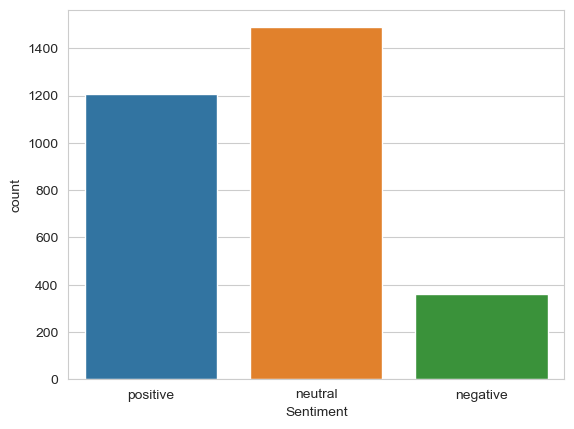

In [123]:
# Task 15: Use an appropriate plot(s) to show how sentiment is distributed in the dataset?
# Comment on this

import seaborn as sns

sns.set_style("whitegrid")
sns.countplot(x='Sentiment', data=df)

#Based on the plot, it appears that the majority of tweets in the dataset are neutral, followed by positive tweets, 
#and then a relatively small number of negative tweets. 

#This information can be used to draw some general conclusions about the overall sentiment of the dataset.

In [124]:
# Task 16(a): What are the 10 most common words in each sentiment?

import nltk
from nltk.tokenize import word_tokenize

positive_df = df[df['Sentiment']=='positive']
negative_df = df[df['Sentiment']=='negative']
neutral_df = df[df['Sentiment']=='neutral']

def tokenize_words(text):
    return word_tokenize(text)

positive_words = positive_df['tweet_cleaned'].apply(tokenize_words)
negative_words = negative_df['tweet_cleaned'].apply(tokenize_words)
neutral_words = neutral_df['tweet_cleaned'].apply(tokenize_words)

positive_word_freq = nltk.FreqDist([word for tweet in positive_words for word in tweet])
negative_word_freq = nltk.FreqDist([word for tweet in negative_words for word in tweet])
neutral_word_freq = nltk.FreqDist([word for tweet in neutral_words for word in tweet])

print('Top 10 most common words in Positive tweets:')
print(positive_word_freq.most_common(10))
print()
print('Top 10 most common words in Negative tweets:')
print(negative_word_freq.most_common(10))
print()
print('Top 10 most common words in Neutral tweets:')
print(neutral_word_freq.most_common(10))


Top 10 most common words in Positive tweets:
[('’', 287), ('amp', 155), ('s', 112), ('t', 86), ('Tesla', 80), ('people', 61), ('much', 61), ('many', 61), ('good', 60), ('would', 57)]

Top 10 most common words in Negative tweets:
[('’', 113), ('amp', 86), ('s', 43), ('t', 33), ('Tesla', 29), ('year', 23), ('would', 20), ('bad', 19), ('time', 19), ('“', 18)]

Top 10 most common words in Neutral tweets:
[('rolling', 207), ('floor', 205), ('laughing', 205), ('’', 121), ('Yes', 63), ('point', 50), ('hundred', 47), ('…', 47), ('amp', 44), ('s', 43)]


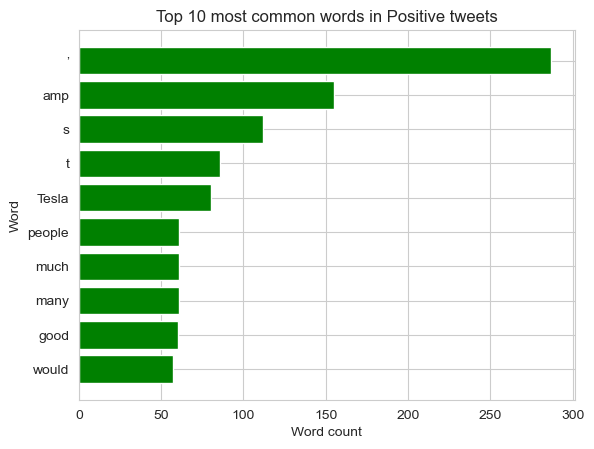

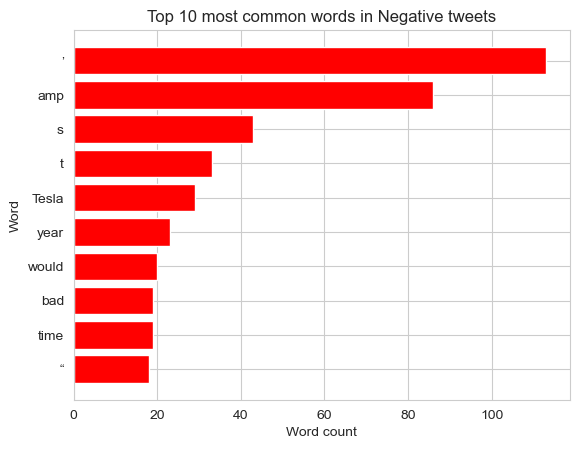

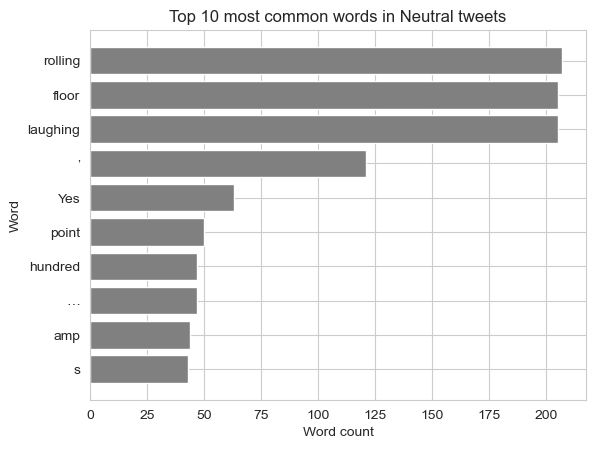

In [125]:
# Task 16(b): Use an appropriate plot(s) to visualize this.

import matplotlib.pyplot as plt

# Get top 10 most common words in positive tweets
positive_top_words = dict(positive_word_freq.most_common(10))
positive_words_list = list(positive_top_words.keys())
positive_word_counts = list(positive_top_words.values())

# Create horizontal bar plot for positive words
plt.barh(positive_words_list, positive_word_counts, align='center', color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 most common words in Positive tweets')
plt.xlabel('Word count')
plt.ylabel('Word')
plt.show()

# Get top 10 most common words in negative tweets
negative_top_words = dict(negative_word_freq.most_common(10))
negative_words_list = list(negative_top_words.keys())
negative_word_counts = list(negative_top_words.values())

# Create horizontal bar plot for negative words
plt.barh(negative_words_list, negative_word_counts, align='center', color='red')
plt.gca().invert_yaxis()
plt.title('Top 10 most common words in Negative tweets')
plt.xlabel('Word count')
plt.ylabel('Word')
plt.show()

# Get top 10 most common words in neutral tweets
neutral_top_words = dict(neutral_word_freq.most_common(10))
neutral_words_list = list(neutral_top_words.keys())
neutral_word_counts = list(neutral_top_words.values())

# Create horizontal bar plot for neutral words
plt.barh(neutral_words_list, neutral_word_counts, align='center', color='grey')
plt.gca().invert_yaxis()
plt.title('Top 10 most common words in Neutral tweets')
plt.xlabel('Word count')
plt.ylabel('Word')
plt.show()

In [126]:
# Comment

#The horizontal bar plot is a great way to visualize the results of the word frequency analysis. 
#It makes it easy to compare the most common words across the different sentiments.

In [127]:
# Task 17: Use an appropriate plot to show the number of Likes and Retweets per sentiment.
# Comment on this.

import pandas as pd
import matplotlib.pyplot as plt

# Group the data by sentiment and calculate the mean number of likes and retweets
grouped_data = df.groupby("Sentiment").agg({"Likes": "mean", "Retweets": "mean"})

grouped_data.head()

,Likes,Retweets
Sentiment,,
negative,74310.754821,6856.454545
neutral,73583.319678,6158.364674
positive,66175.902318,5161.013245


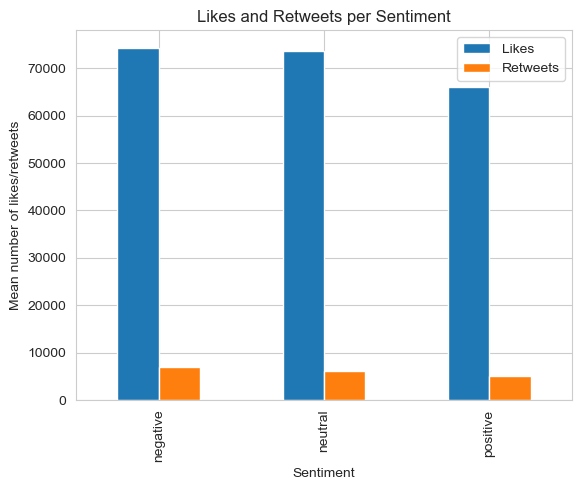

In [128]:
# Plot the data as a grouped bar chart
fig, ax = plt.subplots()
grouped_data.plot(kind="bar", ax=ax)
ax.set_xlabel("Sentiment")
ax.set_ylabel("Mean number of likes/retweets")
ax.set_title("Likes and Retweets per Sentiment")
plt.show()

In [129]:
#Comment

#Based on the above bar plot, it appears that tweets with a negative sentiment tend to receive more likes and 
#retweets on average compared to tweets with a positive or neutral sentiment. However, it's worth noting that the 
#difference in means between the sentiment categories is relatively small, so further analysis would be necessary 
#to determine whether these differences are statistically significant.
